In [1]:
import pandas as pd
import numpy as np
import os
from pandas import Series, DataFrame, Panel
from datetime import datetime


In [2]:

import plotly.plotly as py
import cufflinks as cf



from matplotlib import pyplot


In [3]:
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,8)

In [5]:
import seaborn as sns

In [6]:
hour_df = pd.read_csv("Hour_float_cleaned.csv")

In [7]:
hour_df.head()

,hour,post,country
0,0.000000,705,venezuela
1,0.016667,812,venezuela
2,0.033333,559,venezuela
3,0.050000,773,venezuela
4,0.066667,693,venezuela


In [8]:
sns.set()

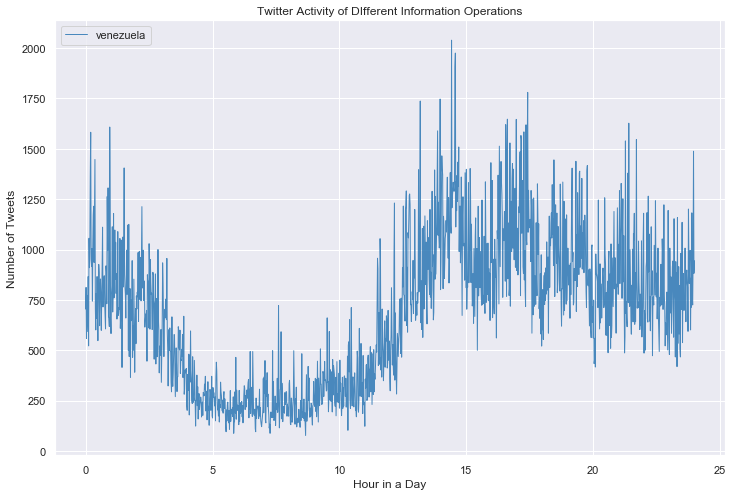

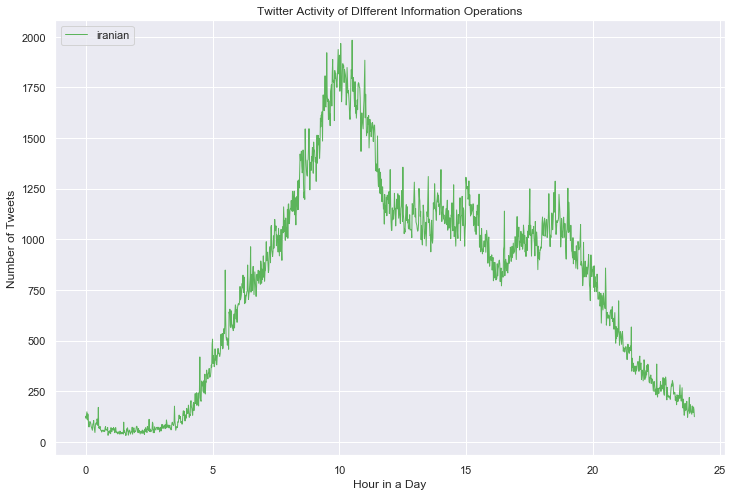

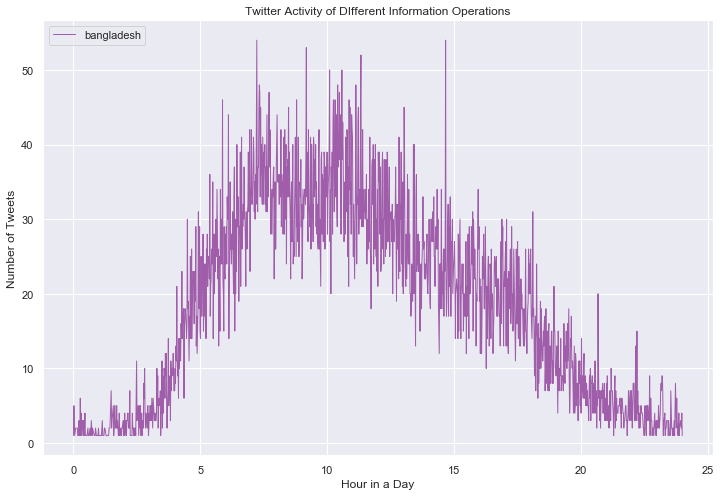

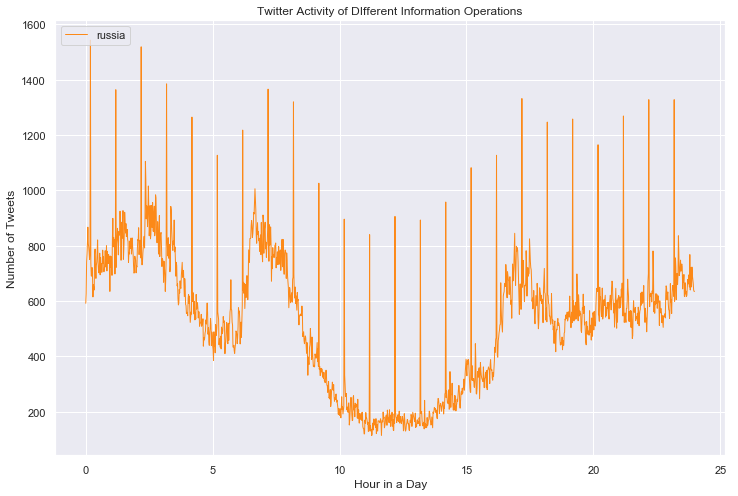

In [9]:
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for c in hour_df['country'].unique():
    num+=1
    temp = hour_df[hour_df.country == c]
    plt.plot(temp.hour, temp.post, color=palette(num), marker='',linewidth=1, alpha=0.9,  label =c)
# plt.plot(year, pop_india, color='orange')
# Add legend
    plt.legend(loc=2, ncol=2)

    plt.xlabel('Hour in a Day')
    plt.ylabel('Number of Tweets')
    plt.title('Twitter Activity of DIfferent Information Operations')
    plt.show()
    
    

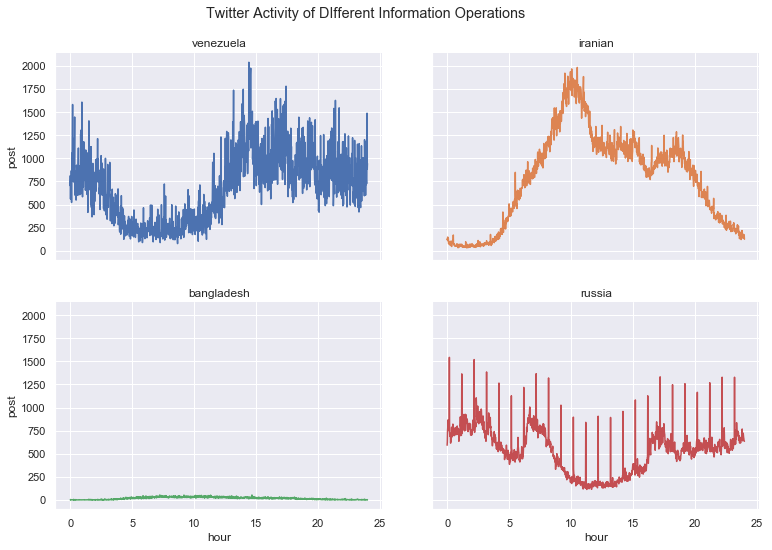

In [10]:

# Create a grid : initialize it
g = sns.FacetGrid(hour_df, col='country', hue='country', col_wrap=2, )
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'hour', 'post')
 
# Fill the area with fill_between
# g = g.map(plt.fill_between,  'hour', 'post', alpha=0.2).set_titles("{col_name} country")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
g.fig.set_size_inches(12,8)
# Add a title for the whole plo
plt.subplots_adjust(top=0.9)
g = g.fig.suptitle('Twitter Activity of DIfferent Information Operations')

plt.show()

In [11]:
def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()
    break_points = [minval] + cut_points + [maxval]
    if not labels:
        labels = range(len(break_points)-1)
    colBin = pd.cut(col,bins=break_points,labels=labels, include_lowest=True)
    return colBin


In [28]:
cut_points = np.arange(1,24,step=1)

In [29]:
cut_points

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

In [32]:
# cut_points = [0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
#         2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,
#         5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,
#         7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,
#         9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 ,
#        11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75,
#        14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  ,
#        16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75, 18.  , 18.25,
#        18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  , 20.25, 20.5 ,
#        20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25, 22.5 , 22.75,
#        23.  , 23.25, 23.5 , 23.75]

In [33]:
labels = cut_points +[24]

In [34]:
# cut_points = [0.5,1,1.5]
# labels = cut_points
# hour_df["hour_divide"] = binning(hour_df["hour"], cut_points, labels)
hour_df["hour_round"] = binning(hour_df["hour"], cut_points, labels)
# print (pd.value_counts(hour_df["hour_divide"], sort = False))

In [18]:
# hour_df = hour_df.astype({'hour_divide':float})

In [35]:
hour_df = hour_df.astype({'hour_round':int})

In [19]:
# count_df = DataFrame(pd.crosstab(hour_df.hour_divide, hour_df.country))

# count_df.reset_index(level=0, inplace=True)

# count_df.head()

In [36]:
count_df = DataFrame(pd.crosstab(hour_df.hour_round, hour_df.country))

count_df.reset_index(level=0, inplace=True)

count_df.head()

country,hour_round,bangladesh,iranian,russia,venezuela
0,1,45,61,61,61
1,2,46,60,60,60
2,3,57,60,60,60
3,4,59,60,60,60
4,5,60,60,60,60


In [38]:
by_hour_country = hour_df.groupby(['hour_divide','country']).agg({'post':'sum'}).reset_index()

by_hour_country.head()

,hour_divide,country,post
0,0.25,bangladesh,21
1,0.25,iranian,1636
2,0.25,russia,12701
3,0.25,venezuela,14328
4,0.50,bangladesh,32


In [41]:
by_hour_country[by_hour_country.country=='russia']

,hour_divide,country,post
2,0.25,russia,12701
6,0.50,russia,10729
10,0.75,russia,10964
14,1.00,russia,11170
18,1.25,russia,12487
22,1.50,russia,12462
26,1.75,russia,12439
30,2.00,russia,11412
34,2.25,russia,12481
38,2.50,russia,13634


In [37]:
# by_hour_country = hour_df.groupby(['hour_round','country']).agg({'post':'sum'}).reset_index()

# by_hour_country.head()

,hour_round,country,post
0,1,bangladesh,81
1,1,iranian,4688
2,1,russia,45564
3,1,venezuela,53227
4,2,bangladesh,94


In [100]:
# print (pd.value_counts(hour_df["hour_divide"], sort = False))

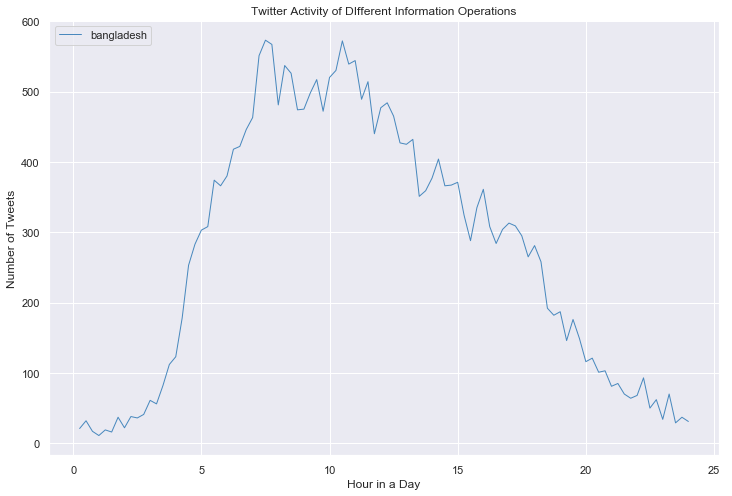

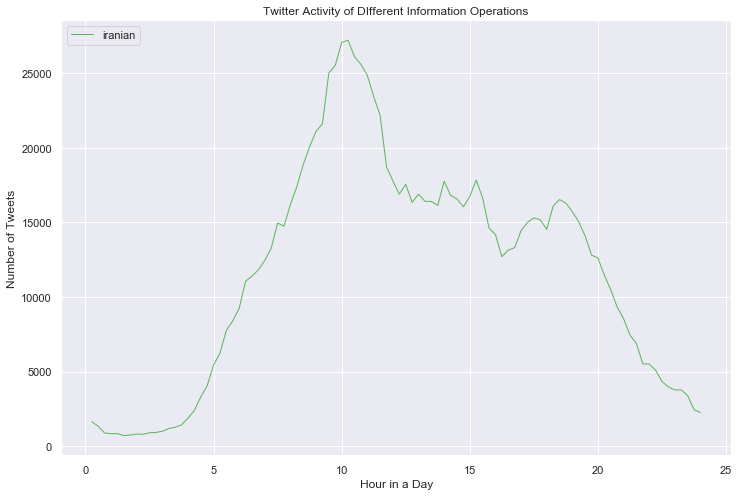

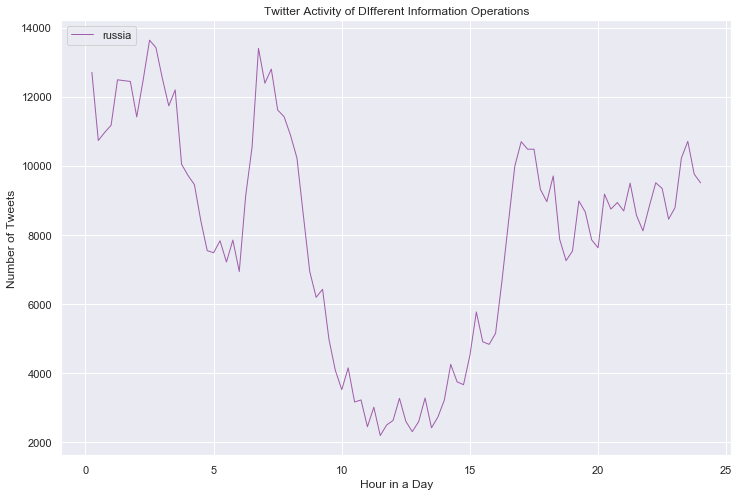

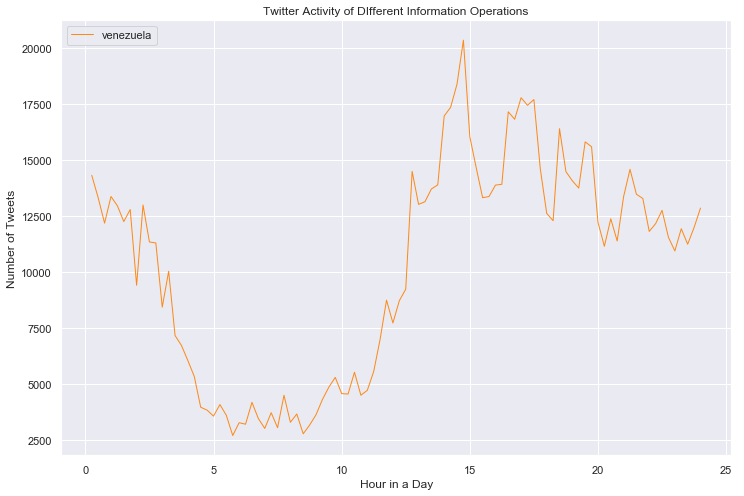

In [25]:
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for c in by_hour_country['country'].unique():
    num+=1
    temp = by_hour_country[by_hour_country.country == c]
    plt.plot(temp.hour_divide, temp.post, color=palette(num), marker='',linewidth=1, alpha=0.9,  label =c)
# plt.plot(year, pop_india, color='orange')
# Add legend
    plt.legend(loc=2, ncol=2)

    plt.xlabel('Hour in a Day')
    plt.ylabel('Number of Tweets')
    plt.title('Twitter Activity of DIfferent Information Operations')
    plt.show()
    

In [42]:
all = {}
for c in by_hour_country['country'].unique():
    peak = 0
    temp = by_hour_country[by_hour_country.country == c]
    for hr in by_hour_country.hour_divide.unique():
        if hr == 0.25:
            if(temp[temp.hour_divide == 0.25].post.values > temp[temp.hour_divide == 0.25].post.values  ) and (temp[temp.hour_divide == 0.25].post.values > temp[temp.hour_divide == 24].post.values  ):
                peak += temp[temp.hour_divide == 0.25].post.values
            elif(temp[temp.hour_divide == 24].post.values > temp[temp.hour_divide == 23.75].post.values  ) and (temp[temp.hour_divide == 24].post.values > temp[temp.hour_divide == 0.25].post.values  ):
                peak += temp[temp.hour_divide == 24].post.values
        else:    
            if (temp[temp.hour_divide == hr].post.values > temp[temp.hour_divide == (hr+0.25)].post.values) and (temp[temp.hour_divide == hr].post.values > temp[temp.hour_divide == (hr-0.25)].post.values):
                peak += temp[temp.hour_divide == hr].post.values
    
    all[c] = (peak)/(temp.post.sum())
    print('Country : ', c, ' -> ', all[c])

c:\users\lizda\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Country :  bangladesh  ->  [0.28221561]
Country :  iranian  ->  [0.12972689]
Country :  russia  ->  [0.24915909]
Country :  venezuela  ->  [0.26777396]


In [43]:
# all_hr = {}
# for c in by_hour_country['country'].unique():
#     peak = 0
#     temp = by_hour_country[by_hour_country.country == c]
#     for hr in cut_points:
#         if hr == 0.5:
#             if(temp[temp.hour_divide == 0.5].post.values > temp[temp.hour_round == 1].post.values  ) and (temp[temp.hour_divide == 0.5].post.values > temp[temp.hour_divide == 24].post.values  ):
#                 peak += temp[temp.hour_divide == 0.5].post.values
#             elif(temp[temp.hour_divide == 24].post.values > temp[temp.hour_divide == 23.5].post.values  ) and (temp[temp.hour_divide == 24].post.values > temp[temp.hour_divide == 0.5].post.values  ):
#                 peak += temp[temp.hour_divide == 24].post.values
#         else:    
#             if (temp[temp.hour_divide == hr].post.values > temp[temp.hour_divide == (hr+0.5)].post.values) and (temp[temp.hour_divide == hr].post.values > temp[temp.hour_divide == (hr-0.5)].post.values):
#                 peak += temp[temp.hour_divide == hr].post.values
    
#     all_hr[c] = (peak)/(temp.post.sum())
#     print('Country : ', c, ' -> ', all_hr[c])